In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

In [2]:
BASE = "../analysis/"

matriz = pd.read_csv(BASE + "matriz_presencia_ausencia_amr.csv", index_col=0)

matriz.head()

,aac(3)-IId,aac(3)-IIe,aadA16,aadA2,almE,almF,almG,aph(3'')-Ib,aph(3')-Ia,aph(6)-Id,...,qnrVC5,sul1,sul2,tet(34),tet(35),tet(59),tet(A),tet(B),tet(D),varG
Species,,,,,,,,,,,,,,,,,,,,,
V_alginolyticus,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,0,0,0,0,0
V_cholerae,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,0,0,1,0,1,1
V_parahaemolyticus,0,0,0,0,0,0,0,1,0,1,...,0,0,1,1,1,1,0,1,0,0
V_vulnificus,0,0,0,0,0,0,0,1,0,1,...,0,0,1,1,0,1,1,0,0,0


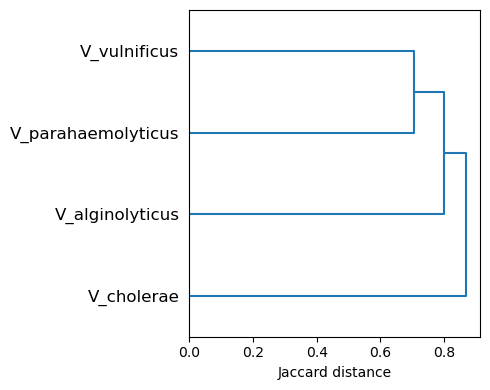

In [3]:
dist = pdist(matriz.values, metric="jaccard")
link = linkage(dist, method="average")

plt.figure(figsize=(5,4))
dendrogram(link, labels=matriz.index, orientation="right")

plt.xlabel("Jaccard distance")
plt.tight_layout()
plt.savefig(BASE + "dendrogram_resistoma.png", dpi=300)
plt.show()

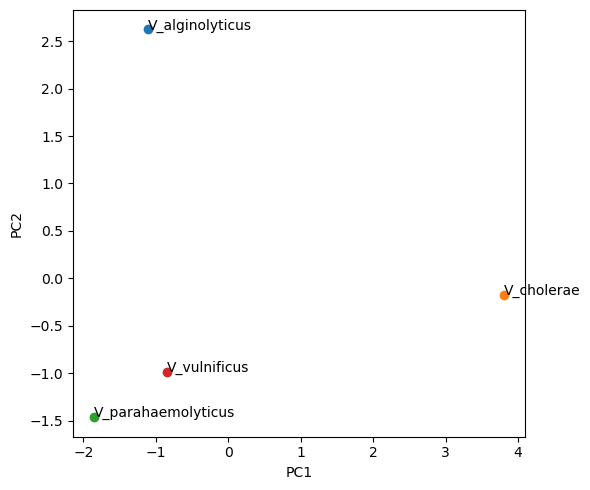

In [4]:
pca = PCA(n_components=2)
coords = pca.fit_transform(matriz)

df_pca = pd.DataFrame(coords, index=matriz.index, columns=["PC1","PC2"])

plt.figure(figsize=(6,5))

for sp in df_pca.index:
    plt.scatter(df_pca.loc[sp,"PC1"], df_pca.loc[sp,"PC2"])
    plt.text(df_pca.loc[sp,"PC1"], df_pca.loc[sp,"PC2"], sp)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.savefig(BASE + "pca_resistoma.png", dpi=300)
plt.show()

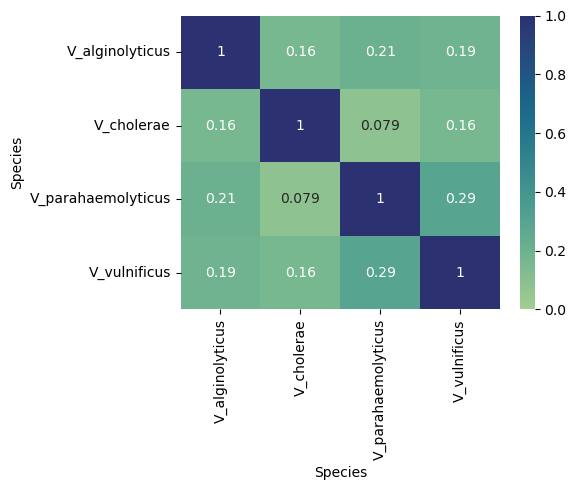

In [5]:
mat_bool = matriz.astype(bool)

dist = pairwise_distances(mat_bool.values, metric="jaccard")
sim = 1 - dist

sim_df = pd.DataFrame(sim, index=matriz.index, columns=matriz.index)

plt.figure(figsize=(6,5))
sns.heatmap(sim_df, annot=True, cmap="crest", vmin=0, vmax=1)

plt.tight_layout()
plt.savefig(BASE + "similitud_jaccard.png", dpi=300)
plt.show()